In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('all_data.csv')
df = df.rename(columns={"Life expectancy at birth (years)":"LEABY"})

In [4]:
print(df.head())
print(df.shape)
print(df.describe())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10
(96, 4)
              Year      LEABY           GDP
count    96.000000  96.000000  9.600000e+01
mean   2007.500000  72.789583  3.880499e+12
std       4.633971  10.672882  5.197561e+12
min    2000.000000  44.300000  4.415703e+09
25%    2003.750000  74.475000  1.733018e+11
50%    2007.500000  76.750000  1.280220e+12
75%    2011.250000  78.900000  4.067510e+12
max    2015.000000  81.000000  1.810000e+13


In [5]:
print(df['Country'].value_counts())

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64


In [6]:
print(df['Year'].value_counts())

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64


In [7]:
df = df.rename(columns={"Life Expecancy at birth (years)":"LEABY"})
print(df.head())


  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


In [8]:
print(df.isnull().sum())

Country    0
Year       0
LEABY      0
GDP        0
dtype: int64


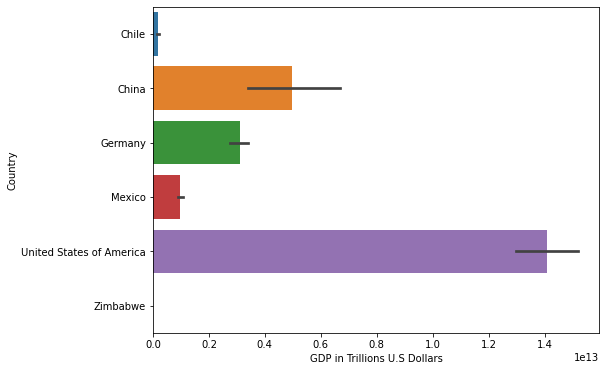

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(x='GDP', y='Country', data =df)
plt.xlabel('GDP in Trillions U.S Dollars')
plt.show()

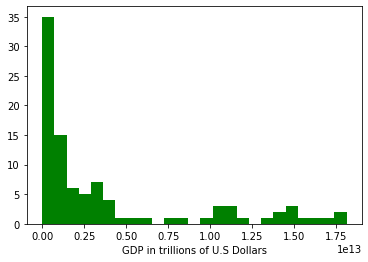

In [10]:
plt.hist(df.GDP, bins=25, color='g')
plt.xlabel('GDP in trillions of U.S Dollars')
plt.show()

In [11]:
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)
# Fixing bin edges
HIST_BINS = np.linspace(-4, 4, 100)

# histogram our data with numpy
data = np.random.randn(1000)
n, _ = np.histogram(data, HIST_BINS)


In [12]:
def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = np.random.randn(1000)
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

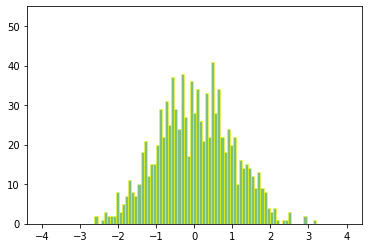

In [13]:
fig, ax = plt.subplots()
_, _, bar_container = ax.hist(df.LEABY, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
plt.show()

In [14]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

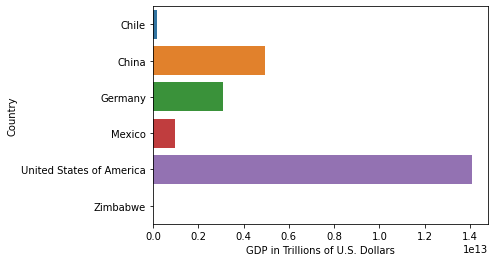

In [15]:
sns.barplot(x='GDP', y='Country', data=dfMeans,)
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.show()
plt.close()

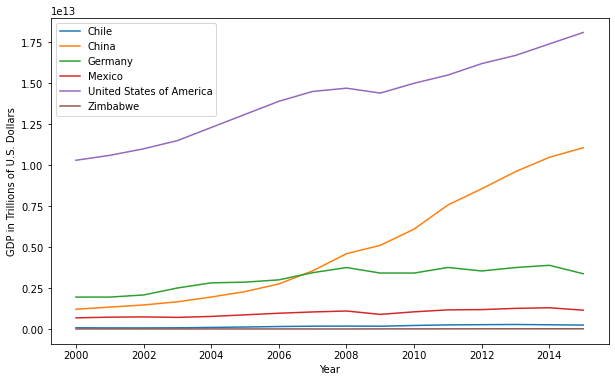

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='upper left')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.show()

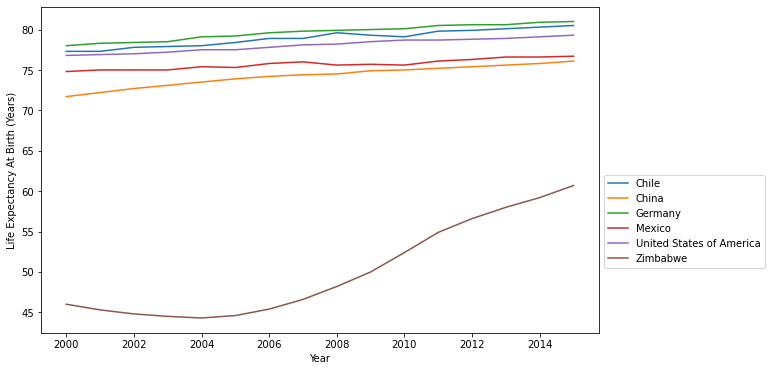

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Life Expectancy At Birth (Years)')
plt.show()

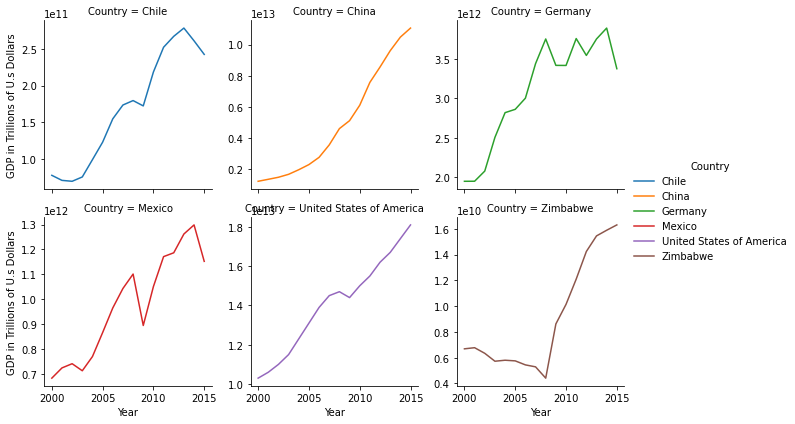

In [113]:
graphGDP = sns.FacetGrid(df, col='Country', col_wrap=3,
                         hue='Country', sharey=False)
graphGDP= (graphGDP.map(sns.lineplot,'Year','GDP')
                       .add_legend()
                       .set_axis_labels('Year', 'GDP in Trillions of U.s Dollars'))

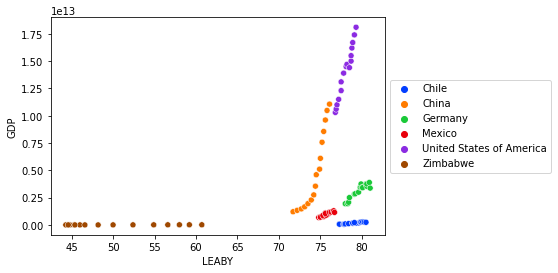

In [108]:
sns.scatterplot(x=df['LEABY'], y=df.GDP, hue = life_expect.Country, palette='bright').legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.show()

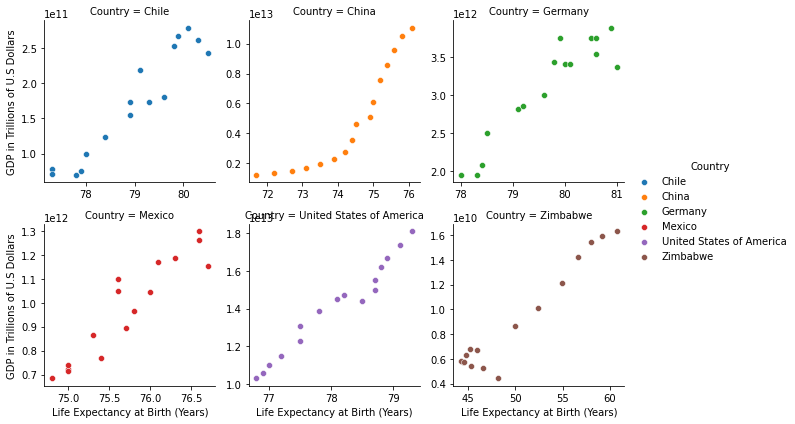

In [107]:
graph = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey= False, sharex=False)
graph=(graph.map(sns.scatterplot,"LEABY", "GDP")
       .add_legend()
       .set_axis_labels('Life Expectancy at Birth (Years)', 'GDP in Trillions of U.S Dollars'))

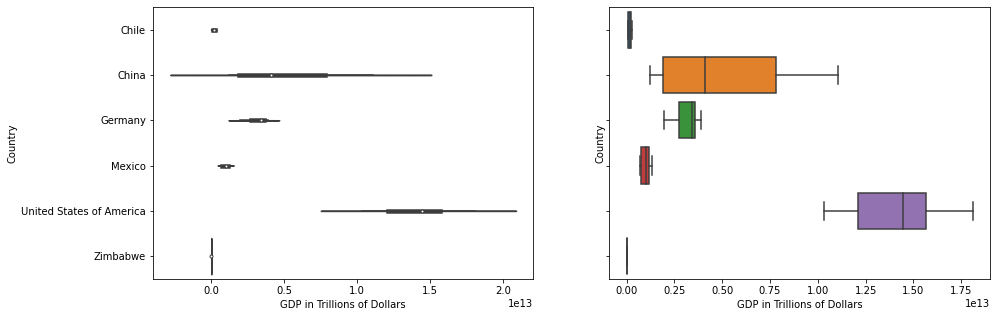

In [121]:
fig,axes= plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0]= sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[1]= sns.boxplot(ax=axes[1], x=df.GDP, y=df.Country )
axes[0].set_xlabel('GDP in Trillions of Dollars')
axes[1].set_xlabel('GDP in Trillions of Dollars')
plt.show()

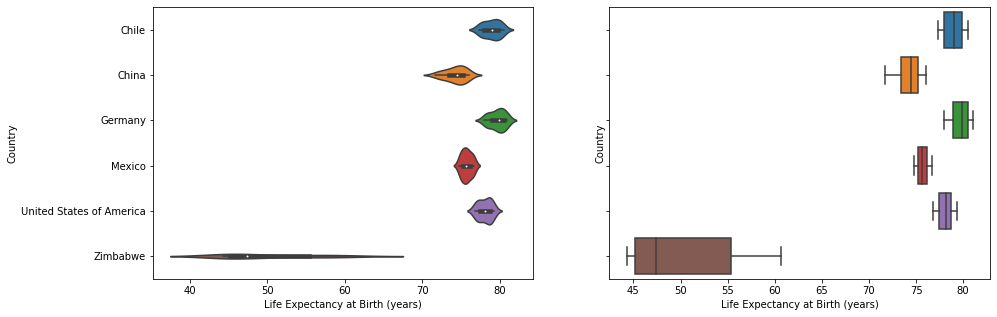

In [122]:
fig,axes= plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0]= sns.violinplot(ax=axes[0], x=df.LEABY, y=df.Country)
axes[1]= sns.boxplot(ax=axes[1], x=df.LEABY, y=df.Country )
axes[0].set_xlabel('Life Expectancy at Birth (years)')
axes[1].set_xlabel('Life Expectancy at Birth (years)')
plt.show()
